In [3]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [4]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [5]:
with open('news_texts.txt', encoding='utf-8') as f:
    text = f.read()
text = text.split('=====\n')

In [6]:
def NER_it(text):
    doc = Doc(text)

    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.tag_ner(ner_tagger)
    for s in doc.spans:
        s.tokens[-1].lemmatize(morph_vocab)
    return [(s.tokens[-1].lemma, s.type) for s in doc.spans]

def get_names(text):
    names = {}
    connect = {}
    for elem in text:
        nfacts = NER_it(elem)
        nam = [fact[0].split(" ")[-1] for fact in nfacts if fact[1]=='PER']
        snam = list(set(nam))
        for n in snam:
            names[n] = names.get(n, 0)+1
            pers = connect.get(n, {})
            for n2 in snam:
                if n != n2:
                    pers[n2] = pers.get(n2, 0)+1
            connect[n] = pers
    return names, connect

In [7]:
names, connections = get_names(text)

In [8]:
names2 = [n + "_" + str(names[n]) for n in names.keys() if names[n]> 5]
names2

['кумпилов_583',
 'машбаш_9',
 'шхалахов_9',
 'адыгейск_38',
 'соловьев_8',
 'цей_8',
 'гетманов_30',
 'меретуковый_60',
 'наролин_30',
 'путин_116',
 'нехая_9',
 'хотко_6',
 'митрофанов_24',
 'дрокин_15',
 'сташ_9',
 'резник_13',
 'карданов_17',
 'тихон_9',
 'топоров_10',
 'широков_26',
 'медведев_16',
 'адыгея_17',
 'лебедев_10',
 'куановый_12',
 'нарожный_36',
 'дауров_6',
 'мирза_13',
 'алибердов_8',
 'свеженец_12',
 'ра_6',
 'самойленко_12',
 'картамышев_6',
 'хакурат_7',
 'завгородний_15',
 'куадж_7',
 'аутлев_11',
 'меретуков_13',
 '._13',
 'тлехас_11',
 'майкоп_11',
 'мишустин_12',
 'алифиренко_6',
 'горохов_9',
 'гиагинский_10',
 'трахов_6',
 'ошуркова_7',
 'петров_10',
 'чуякий_6',
 'керашев_22',
 'даша_6',
 'сиюхов_6',
 'чича_6',
 'намиток_7',
 'абрегов_6',
 'иванович_7',
 'лобод_8',
 'шевченко_10',
 'шовген_6',
 'выздоровевших_14',
 'мамия_9',
 'сапиев_9',
 'совмен_11',
 'устинов_6',
 'глущенко_10',
 'коблев_12',
 'тхакушин_9',
 'тахтамукайский_6',
 'бутусов_6',
 'тлеуж_6',

In [9]:
pers2={n:{n2:connections[n][n2] for n2 in connections[n].keys() if names[n2] > 5 and n2 != ')'}
           for n in connections.keys() if names[n]> 5 and n != ')'}
pers2

{'кумпилов': {'машбаш': 6,
  'наролин': 27,
  'путин': 81,
  'нехая': 4,
  'хотко': 4,
  'митрофанов': 22,
  'дрокин': 15,
  'сташ': 3,
  'резник': 12,
  'топоров': 9,
  'широков': 20,
  'адыгея': 7,
  'нарожный': 29,
  'дауров': 2,
  'мирза': 8,
  'свеженец': 12,
  'ра': 5,
  'картамышев': 6,
  'куадж': 4,
  'аутлев': 8,
  'гетманов': 24,
  'меретуков': 10,
  'лебедев': 4,
  'мишустин': 8,
  'адыгейск': 5,
  'ошуркова': 1,
  'петров': 3,
  'куановый': 7,
  'чуякий': 4,
  'керашев': 16,
  'абрегов': 1,
  'хакурат': 2,
  'мамия': 6,
  'трахов': 2,
  'карданов': 12,
  'тихон': 2,
  'сапиев': 8,
  'совмен': 6,
  'устинов': 6,
  'коблев': 6,
  'медведев': 11,
  'лобод': 4,
  'меретуковый': 23,
  'завгородний': 7,
  'сиюхов': 1,
  'тлехас': 3,
  'чича': 3,
  'тлеуж': 5,
  'алай': 5,
  'выздоровевших': 1,
  'жуков': 3,
  'сапий': 11,
  'савва': 1,
  'шхалахов': 6,
  'патрушев': 10,
  'шовген': 2,
  'цей': 1,
  'тхакушин': 7,
  'зыбкин': 5,
  'глущенко': 3,
  'шевченко': 6,
  'иванович': 1,
 

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np

In [11]:
def formASocialGraph(persons):
    G=nx.Graph()
    for n in persons.keys():
        for n2 in persons[n].keys():
            G.add_edge(n, n2)
    return G

In [12]:
G1=formASocialGraph(pers2)

In [13]:
def drawASocialGraph(G, persons, freqs, colors='b', layout='spring'):
    if layout=='kawai':
        pstn=nx.kamada_kawai_layout(G)
    elif layout=='circle':
        pstn=nx.drawing.layout.circular_layout(G2)
    elif layout=='random':
        pstn=nx.drawing.layout.random_layout(G2)
    else:
        pstn=nx.spring_layout(G)
    sz=[freqs[n] for n in G.nodes]
    lw=[math.log(persons[e[0]][e[1]], 10)+1 for e in G.edges]
    nx.draw(G, pos=pstn, node_color=colors, edge_color='g', with_labels=True, node_size=sz, width=lw);

<IPython.core.display.Javascript object>


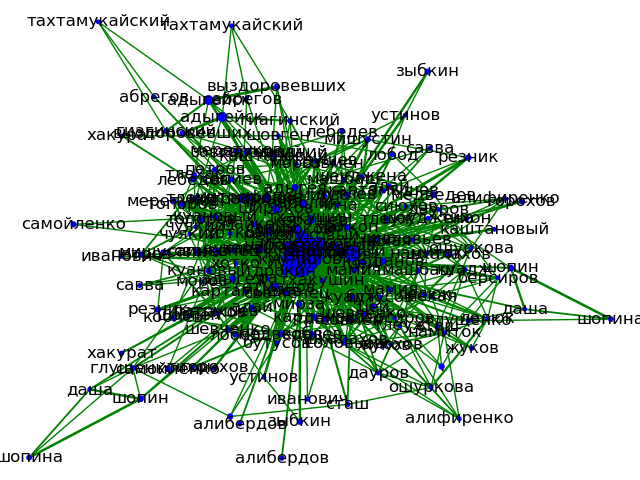

In [42]:
drawASocialGraph(G1, pers2, names)

In [43]:
bb = nx.betweenness_centrality(G1)
nx.set_node_attributes(G1, bb, 'betweenness')

gclr=[(bb[i], i) for i in G1.nodes()]
drawASocialGraph(G1, pers2, names)

for el in sorted(gclr)[::-1][:10]:
    print(el[1])

кумпилов
путин
нарожный
меретуковый
наролин
дрокин
глущенко
адыгейск
соловьев
гетманов
